# Practica 1. Machine Learning

#### Titulo: Analisis Exploratorio Airbnb dataset
#### Autor: Isabel Afan de Ribera
#### Fecha: 30/10/2020

## Objetivo del trabajo

El objetivo de este análisis exploratorio es conocer distintas caracteristicas o atributos de las reservas que se realizan a través de Airbnb en distintas zonas de Nueva York. Principalmente se van a analizar variables como el precio, la disponibilidad o la localización para conocer las tendencias que se siguieron en las reservas durante el año 2019 y ver si estan son acordes a las ideas preconcebidas.

## Descripción del dataset

El dataset empleado en este análisis contiene 49.000 registros con información sobre distintas reservas realizadas en distintas áreas de Nueva York durante 2019 y extraídas de listados proporcionados por Airbnb. Las variables contenidas en cada uno de estos registros son las siguientes.

* `id`: ID de listado
* `name`: nombre de la lista
* `host_id`: ID del anfitrión
* `host_name`: nombre del anfitrión
* `neighbourhood_group`: ubicación
* `neighbourhood`: barrio
* `latitude`: coordenadas de latitud
* `longitude`: coordenadas de longitud
* `room_type`: tipo de habitación
* `price`: precio en dólares
* `minimum_nights`: noches mínimas
* `number_of_reviews`: número de opiniones
* `last_review`: última opinión
* `reviews_per_month`: opiniones por mes
* `calculated_host_listings_count`: número de propiedades del anfitrión
* `availability_365`: disponibilidad 

## Importación de las librerias

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Carga de la base de datos

In [2]:
# carga de la base de datos mediante la funcion read csv de pandas
reservas_airbnb = pd.read_csv('./data/AB_NYC_2019.csv')
reservas_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Análisis del dataset y las variables

In [3]:
# listado de variables
list(reservas_airbnb)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [4]:
# dimensiones del dataframe, 48895 filas y 16 columnas
reservas_airbnb.shape

(48895, 16)

In [5]:
# imprime las 10 primeras observaciones
reservas_airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
# imprime las 10 ultimas observaciones
reservas_airbnb.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
# ejecuto info para conocer mas informacion sobre los datos con los que voy a trabajar: 3 variables son de tipo float, 
# 7 integer y 6 de tipo objeto. Ademas, puede observarse que algunas variables contienen missing values.
reservas_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# aplico funcion describe para que me muestre informacion sobre estadisticos descriptivos de las variables numericas 
# me da recuento, media, desviacion estandar, minimo, maximo y cuantiles (25%, 50%, 75%)
reservas_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
# vuelvo a ejecutar describe con las variables de tipo object
# devuelve recuento, unicos, top y frecuencia
reservas_airbnb.describe(include = ['object'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [10]:
# recuento y eliminacion de valores nulos para limpiar los datos
reservas_airbnb.isnull().sum()
reservas_airbnb.dropna(how = 'any', inplace = True)

In [11]:
# compruebo que no hay valores nulos
reservas_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

In [12]:
# compruebo si hay algun duplicado
reservas_airbnb.duplicated().sum()

0

In [13]:
# elimino columnas cuya informacion no considero necesaria para mi analisis y empiezo a trabajar con el nuevo dataframe
reservas = reservas_airbnb.drop(['id', 'name', 'host_name', 'last_review'], axis = 1)
reservas

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...
48782,83554966,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,1.00,1,147
48790,257683179,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,1.00,6,339
48799,211644523,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,1.00,1,87
48805,273841667,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2.00,1,40


## Visualización de los datos

### Histogramas de las variables

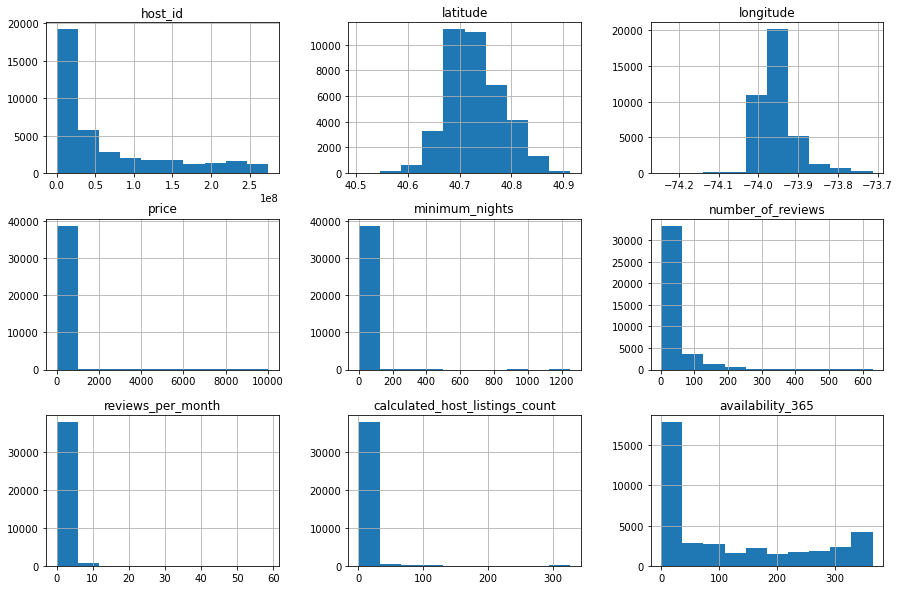

In [14]:
reservas.hist(figsize = (15, 10), bins = 10)
plt.show()

De la distirbucion de cada una de las variables numericas puede concluirse que la latitude y la longitud siguen una distribucion normal, estando la mayoria de alojamients concentrados en ciertas areas. La availability nos indica que muy pocos anfitriones tiene disponibilidad durante todo el año. El precio nos aporta la informacion de que hay una clara concentracion del precio del hospedaje en torno a los 1000 habiendo incluso alojamientos por cero euros. En cuanto a las reviews no suelen superarse las 6 mensuales ni las 60 totales del alojamiento.

## Correlaciones

Para analizar las relaciones entre las variables numericas calculo la matriz de correlacion y la represento graficamente haciendo uso del paquete seaborn para una mejor comprension

In [16]:
corr = reservas.corr()
corr

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.012823,0.141276,0.006263,-0.051673,-0.141973,0.296274,0.149417,0.155361
latitude,0.012823,1.000000,0.088259,0.031344,0.024893,-0.008559,-0.010117,0.004340,-0.021921
longitude,0.141276,0.088259,1.000000,-0.155298,-0.055414,0.054746,0.146228,-0.093348,0.102573
price,0.006263,0.031344,-0.155298,1.000000,0.025501,-0.035924,-0.030623,0.052895,0.078276
minimum_nights,-0.051673,0.024893,-0.055414,0.025501,1.000000,-0.069366,-0.121712,0.073474,0.101658
number_of_reviews,-0.141973,-0.008559,0.054746,-0.035924,-0.069366,1.000000,0.549699,-0.059796,0.193409
reviews_per_month,0.296274,-0.010117,0.146228,-0.030623,-0.121712,0.549699,1.000000,-0.009442,0.185896
calculated_host_listings_count,0.149417,0.004340,-0.093348,0.052895,0.073474,-0.059796,-0.009442,1.000000,0.182981
availability_365,0.155361,-0.021921,0.102573,0.078276,0.101658,0.193409,0.185896,0.182981,1.000000


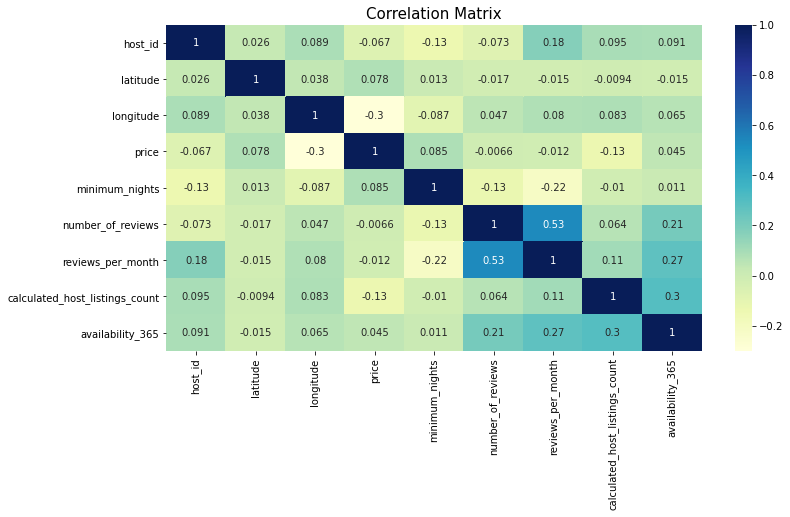

In [17]:
corrMatrix = reservas.corr(method = 'kendall')
plt.figure(figsize = (12, 6))
ax = sns.heatmap(corrMatrix, annot = True, cmap = 'YlGnBu')
plt.title('Correlation Matrix', fontsize = 15)
plt.show()

Como puede observarse en la matriz de correlaciones no existen fuerten relaciones positivas entre las variables, a excepcion de los elementos diagonales. Solo hay una cierta relacion positiva, es decir, que cuando una crece tamben lo hace la otra en los atributos relativos al numero de reviews totales y por mes y entre la disponibilidad anual y el numero de propiedades del anfitrion. Ademas, puede analizarse que hay algunas variables que se relacionan de forma negativa como el precio y la latitud (cuando una aumenta la otra disminuye). En general, hay poca dependencia entre las variables.

## Outliers

Para analizar los outliers utilizaremos el analisis grafico mediante diagrama de cajas o boxplot. Un outlier o valor atipico es una observacion numericamente muy diferente del resto de los datos.

In [18]:
# repetimos funcion describe pues los estadisticos nos serviran para el analisis de outliers
reservas_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


[Text(1, 0, 'longitude')]

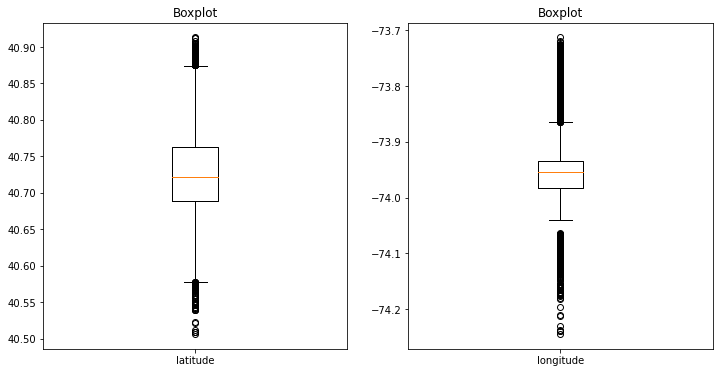

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.boxplot(reservas['latitude'])
ax2.boxplot(reservas['longitude'])

ax1.set_title('Boxplot')
ax1.set_xticklabels(['latitude'])

ax2.set_title('Boxplot')
ax2.set_xticklabels(['longitude'])

En el caso de la latitude y longitude existen valores atipicos como podemos ver fuera del extremo superior e inferior del bigote, siendo especialmente caracteristico en la longitude. Esto podria deberse a que de forma general las reservas de alojamiento en NY se hacen en zonas centricas, salvo en ciertos casos donde se reservan alojamiento en zonas mas alejadas.

[Text(1, 0, 'minimum_nights')]

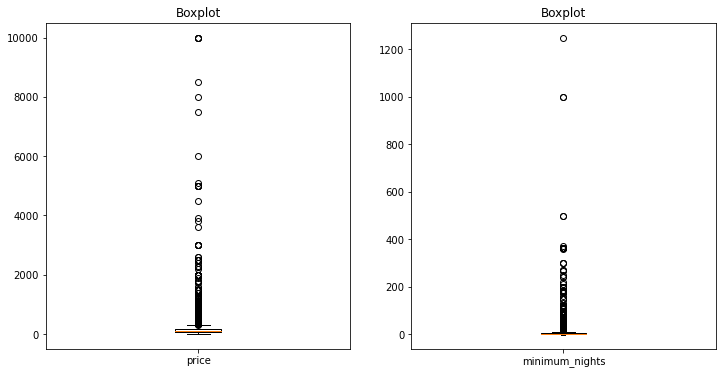

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.boxplot(reservas['price'])
ax2.boxplot(reservas['minimum_nights'])

ax1.set_title('Boxplot')
ax1.set_xticklabels(['price'])

ax2.set_title('Boxplot')
ax2.set_xticklabels(['minimum_nights'])

Para el caso de la variable price y minimun_nights existen bastantes outliers todos ellos por encima de los extremos superiores. Por ejemplo, en el caso del precio la media es de 152.720687 dolares (datos de los estadisticos descriptivos calculados anteriormente) pero existen observaciones donde el precio ha llegado incluso a los 10 mil, siendo casos puntuales de personas que gasta mucho dinero en su alojamiento. En el caso de minimun_nights la media es de 7.02. Sin enbargo, hay valores atipicos  que llegan incluso a superar 1200 noches. Los valores extremos de price y minimum_nights tiene mucho sentido que se relacionen. A medida que aumenta uno lo hara el otro.

[Text(1, 0, 'availability_365')]

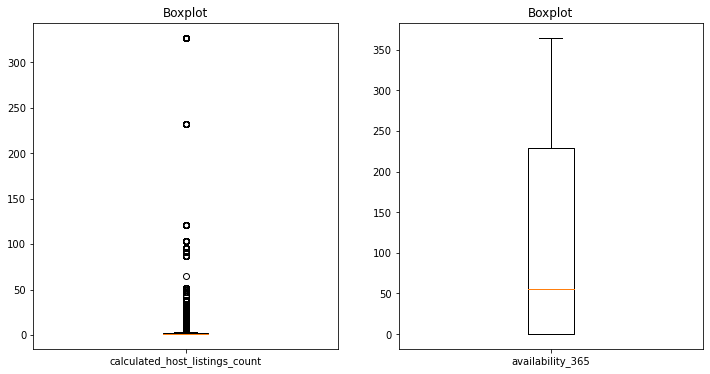

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.boxplot(reservas['calculated_host_listings_count'])
ax2.boxplot(reservas['availability_365'])

ax1.set_title('Boxplot')
ax1.set_xticklabels(['calculated_host_listings_count'])

ax2.set_title('Boxplot')
ax2.set_xticklabels(['availability_365'])

Con respecto a la variable calculated_host_listings_count puede observarse que tambien existen bastante outliers pues a pesar de que la media de propiedades se encuentra en 7.14, teniendo el 75% de anfitriones 2 propiedades, existen algunos que llegan a tener hasta 327. En cuanto a la disponibilidad no existen outliers pues esta el limite de los 365 dias del año.

Text(0.5, 1.0, 'Type of room by price')

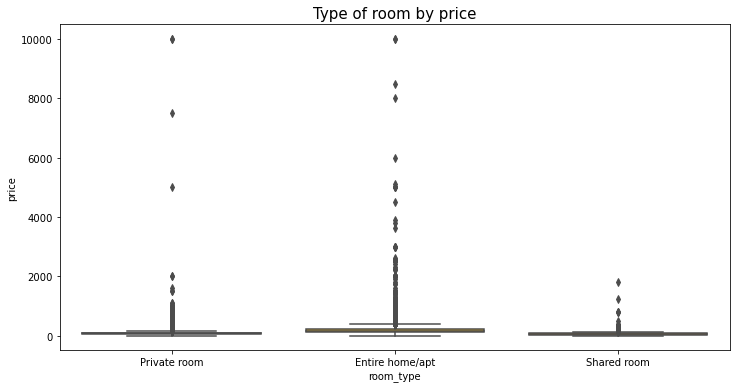

In [22]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(data = reservas, x = 'room_type', y = 'price', palette = 'Wistia')
plt.title('Type of room by price', fontsize = 15)

Por último, debido a la alta relacion que el sentido comun nos dice que deberia haber entre el tipo de habitacion y el precio se han calculado los outliers para cada tipo y precio. Como puede observarse el tipo de habitacion compartida es el que menos valores atipicos tiene ya que la gente que suele alquilar este tipo de alojamiento cuenta con un presupuesto mas limitado. En camcio, por logica en el caso de habitaciones privadas y apartamentos o casas enteras hay ciertas personas que se salen de lo comun y estan dispuestas a pagar precios muy elevados.

## Otras visualizaciones

Text(0.5, 1.0, 'Type of room by availability')

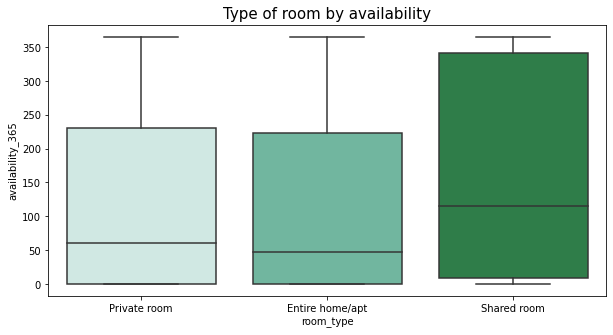

In [23]:
# Boxplot
plt.figure(figsize = (10, 5))
ax = sns.boxplot(data = reservas, x = 'room_type', y = 'availability_365', palette = 'BuGn')
plt.title('Type of room by availability', fontsize = 15)

La mayor disponibilidad anual se da en el caso de las habitaciones compartidas y la que menos en alojamientos enteros, lo cual puede deberse a que resulta mas facil tener disponible una habitacion en casa que un apartamento o casa entera durante un largo periodo del año.

Text(0.5, 1.0, 'Location by neighbourhood_group')

<Figure size 720x360 with 0 Axes>

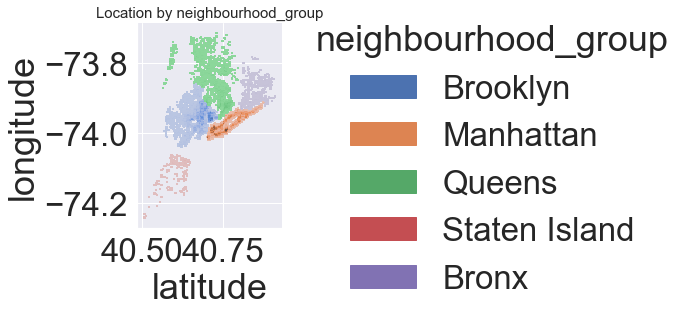

In [61]:
plt.figure(figsize = (10, 5))
ax = sns.displot(reservas, x = 'latitude', y = 'longitude', hue = 'neighbourhood_group')
plt.title('Location by neighbourhood_group', fontsize = 15)

Mediante este grafico puede analizarse la dispersion de datos por ubicacion, las zonas mas solicitadas son Brooklyn y Manhattan, al ser las mas centricas, seguidas de Staten island como refleja la concentracion de los datos. Mientras que en la zona de Queens y Bronx situadas en las zonas del Noreste y Suroeste hay bastante mas dispersiony  menos reservas.

## Dummies

Para poder trabajar con las variables cualitativas vamos a transformar estas en variables cuantitativas a traves de dummies o variables ficticias. Para ello primero vamos a investigar los distintos valores que toman nuestras variables categoricas (neighbourhood, neighbourhood_group y room_type). Despues, vamos a ejecutar la funcion get_dummies de pandas para que convierta nuestras variables categoricas seleccionadas (neighbourhood_group y room_type) en variables dummies con valores 0 y 1.

In [67]:
reservas['neighbourhood'].unique()
# vamos a evitar prescindir de esta variable categorica debido a la gran cantidad de categorias que tiene y ya que tenemos una 
# muy similar, neighbourhood_group

array(['Kensington', 'Midtown', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Harlem', 'Greenpoint', 'Bushwick', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Flatbush', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [69]:
reservas['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [70]:
reservas['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [73]:
dummies = pd.get_dummies(reservas, columns = ['neighbourhood_group', 'room_type'])
dummies

,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,2845,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
3,4869,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
4,7192,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0
5,7322,Murray Hill,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,83554966,Upper East Side,40.78099,-73.95366,129,1,1,1.00,1,147,0,0,1,0,0,0,1,0
48790,257683179,Flushing,40.75104,-73.81459,45,1,1,1.00,6,339,0,0,0,1,0,0,1,0
48799,211644523,Great Kills,40.54179,-74.14275,235,1,1,1.00,1,87,0,0,0,0,1,0,1,0
48805,273841667,Mott Haven,40.80787,-73.92400,100,1,2,2.00,1,40,1,0,0,0,0,1,0,0


## Conclusiones

De este analisis puede concluirse que existe muy escasa relacion entre las variables numericas a la hora de hacer una reserva de alojamiento en Airbnb en la ciudad de Nueva York. Además, de que existen muchos casos atipicos en variables como los precios o las zonas donde se alquila pues aunque la mayoria de reservas se hacen a precios bajos y durante pocas noches, existen casos de alquiler durante largos plazos de tiempo y con importes pagados mas elevados. Igualmente, con respecto a los barrios donde suelen alquilarse habitaciones o casas se ha observado que las zonas centricas son claramente las mas demandadas.  

## Referencias

* AB_NYC_2019.csv obtenido de kaggle: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
* Airbnb Analysis, Visualization and Prediction (2019): https://www.kaggle.com/chirag9073/airbnb-analysis-visualization-and-prediction
* Bodas, D (2020) Temario Machine Learning. Colegio Universitario de Estudios Financieros (Madrid)
* Detailed exploratory data analysis with python (2016): https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
* Garcia, Y (2020) Temario Programacion con Python. Colegio Universitario de Estudios Financieros (Madrid)
* Matplotlib org https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html
* Pandas documentation (2020) https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
* Seaborn.  Visualizing distributions of data https://seaborn.pydata.org/tutorial/distributions.html
* The Dummy’s Guide to Creating Dummy Variables (2017) https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
* Visualizing distributions of data obtenido de seaborn: https://seaborn.pydata.org/tutorial/distributions.html

